# Assignment 2 - Nature Connectedness after Nature-Based Activities

My git repository is here: https://github.com/abeecarpenter/everything-counts-assignment-2

I decided to use a different dataset for this assignment from my first assignment, so I have included some context and descriptive analysis of this dataset too. 

----

This is using a dataset from yougov - https://www.data.gov.uk/dataset/69716440-a85e-44a3-8897-4c09aabdca89/survey-data-on-wellbeing-and-nature-connectedness-before-and-after-taking-part-in-nature-based-

I came across this dataset when reading a paper with Miles Richardson, who was looking at the impact of nature-related activities on feelings of nature connectedness - https://findingnature.org.uk/2021/10/13/three-good-things-walking/. 

*Dataset Citation: Pocock, M.J.O.; Hamlin, I.; Christelow, J.; Passmore, H.-.; Richardson, M. (2022). Survey data on wellbeing and nature connectedness before and after taking part in nature-based activities in 2020, UK. NERC EDS Environmental Information Data Centre. https://doi.org/10.5285/56d4b055-c66b-42b9-8962-a47dfcf3b8b0*

------

This dataset includes data from surveys on wellbeing, nature connectedness and pro-nature conservation behaviour scores from adult participants before and after taking part in nature-based activities. Respondents were randomly allocated into six different groups: citizen science (butterfly and pollinator), noticing nature (three good things in nature activity), combined citizen science and three good things in nature, and a wait list control group.

There were 500 respondents who completed both the before and after surveys and took part in the activities (or assigned to control group), and these are marked as participants. 

** *These comments were adapted from - https://catalogue.ceh.ac.uk/documents/56d4b055-c66b-42b9-8962-a47dfcf3b8b0*

------

I would like to use this dataset to assess if taking part in the activities had any impact on Nature Connectedness, by mainly looking at the Inclusion of Nature in Self score (INS).

## 1. Loading, Reviewing and Cleaning the Data. 

Firstly, we need to load in the data, see what columns are available, the state of the data and do any cleaning that is necessary. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import io
import requests

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sp

df_url = 'https://raw.githubusercontent.com/abeecarpenter/everything-counts-assignment-2/refs/heads/main/natureupclosedata1.csv'
url_content = requests.get(df_url, verify = False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df.head()

# df=pd.read_csv('natureupclosedata1.csv')
# df.head()

,PersonID,LineSurvey1,ResponseIDSurvey1,DateSurvey1,LineSurvey2,ResponseIDSurvey2,DateSurvey2,Participant,INS_pre,INS_post,...,disliketheme_complexity,disliketheme_technology,disliketheme_lackofsuccess,disliketheme_interferedwithnatureengagement,disliketheme_nothing,disliketheme_other,Median_IMD_postcodedistrict,Mean_IMD_postcodedistrict,latitude,longitude
0,77039.0,27,R_1Id5QzfYdxcrGWN,14/07/2020 04:21,6.0,R_6QEkF3pX5G9Xmg1,22/07/2020 05:02,1,6.0,6.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,17223.0,3,R_0kq942VbdIy9kkN,14/07/2020 01:29,7.0,R_1OH2XfO0NsrOXxH,22/07/2020 05:26,1,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23942.0,35,R_1GVwTFoFmVDxQfX,14/07/2020 05:09,8.0,R_3QMq4B5RKWCZn0D,22/07/2020 05:22,1,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86958.0,38,R_1rGinDGCzJsYjsr,14/07/2020 05:27,9.0,R_wWW9T8IS39s8pEZ,22/07/2020 05:31,1,4.0,5.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19857.0,43,R_1gTtqajS1M8c0O5,14/07/2020 05:42,10.0,R_2uECLSRSZ4nVWwe,22/07/2020 05:47,1,6.0,6.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----
So, there are a **lot** of columns (65) in this dataset, and not all of them are relevant to the questions I want to look at, so below are the columns that I am going to keep to use in my analysis. 

### Relevant Columns

| column         | description |
| ---------------- | ------------|
| `Participant`               | `0` or `1` - whether the respondent finished the pre/post survey and the activities. |
| `INS_pre`/`_post`        | Inclusion of Nature in Self scale - a measurement from `1`-`7` reporting the extent to which nature is included in their sense of self. |
| `NR6sum_pre`/`_post`  | This is the sum of six components of Nature Relatedness scale, scored on a 5-point scale from `1` = disagree strongly, to `5` = agree strongly. |
| `Health_pre`/`_post`      | Score from a single-item scale ranging from `1` = Poor to `5` = Excellent.  |
| `Happiness_pre`/`_post` | Score from an 11-point scale ranging from `0` = Not at all happy, to `10` = Very happy. |
| `Age`                    | Reported age in years. |
| `Sex`                     | The sex selected by the respondent, from `female`, `male`, `other`, `prefer not to say` |
| `spendtimeoutsideatleastafewtimesperweek`                  | where `1` = almost everyday or a few times a week, `0` = once a week, less than once a week or none. |
|`conditiontext`                             | `pollinator`, `butterfly`, `noticingnature`, `combinedpollinator`,`combinedbutterfly`, `acontrol`  |

** *These comments were adapted from the metadata that came with the dataset* 

---

In order to clean up the data, I will take these steps: 

 * change the dataset to just include participants (e.g., participants = 1). These are the people who completed both the pre and post surveys and took part in the activities.
 * reduce column list to those I am interested in, as in the table above.  
 * remove the null values from the dataset.
 * creating some useful columns to aid in analysis later

In [2]:
# this is reducing the dataset to just the participants -> ~500 respondents

nc = df[df['Participant'] == 1]
nc.shape

(500, 65)

In [3]:
# this is reducing the column list to just the pre/post values, 
# demographic, group they were in , and time they spent outdoors before the activities.

ncs = nc[['INS_pre', 'INS_post', 'NR6sum_pre', 'NR6sum_post', 'Health_pre', 'Health_post', 
          'Happiness_pre', 'Happiness_post', 'Age', 'Sex', 'spendtimeoutsideatleastafewtimesperweek', 
          'conditiontext']]


In [4]:
# this is to see if there are any null values
ncs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   INS_pre                                  500 non-null    float64
 1   INS_post                                 500 non-null    float64
 2   NR6sum_pre                               500 non-null    float64
 3   NR6sum_post                              500 non-null    float64
 4   Health_pre                               500 non-null    float64
 5   Health_post                              500 non-null    float64
 6   Happiness_pre                            500 non-null    float64
 7   Happiness_post                           500 non-null    float64
 8   Age                                      498 non-null    float64
 9   Sex                                      500 non-null    object 
 10  spendtimeoutsideatleastafewtimesperweek  500 non-null  

So, there are 2 null values in the `Age` column.

By using `.dropna()`, we can get rid of any null values. 

So, now we have a a dataset with 498 rows, with hopefully no nulls. 

In [5]:
ncs = ncs.dropna()
ncs.shape

(498, 12)

----
As a final step, in order to aid in some analysis later on in the notebook, I am creating columns for the differences between pre and post scores for each of the surveys - I will explain more about the individual surveys later. 

In [6]:
# difference for INS
ncs['INS_prepost']=ncs['INS_post']-ncs['INS_pre']

# difference for NR6
ncs['NR6sum_prepost']=ncs['NR6sum_post']-ncs['NR6sum_pre']

# difference for health 
ncs['Health_prepost']=ncs['Health_post']-ncs['Health_pre']

# difference for happiness
ncs['Happiness_prepost']=ncs['Happiness_post']-ncs['Happiness_pre']

In [7]:
# and here I can check to see if the columns got added correctly and check their characteristics
ncs.describe()

,INS_pre,INS_post,NR6sum_pre,NR6sum_post,Health_pre,Health_post,Happiness_pre,Happiness_post,Age,spendtimeoutsideatleastafewtimesperweek,INS_prepost,NR6sum_prepost,Health_prepost,Happiness_prepost
count,498.000000,498.000000,498.000000,498.00000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,4.686747,4.843373,25.443775,26.00000,3.375502,3.463855,6.815261,7.158635,51.590361,0.935743,0.156627,0.556225,0.088353,0.343373
std,1.329992,1.236422,3.932255,3.44955,0.999780,1.022729,1.894078,1.797868,14.211427,0.245457,0.916848,2.334642,0.542207,1.120760
min,1.000000,1.000000,7.000000,10.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-4.000000,-10.000000,-2.000000,-5.000000
25%,4.000000,4.000000,24.000000,24.00000,3.000000,3.000000,6.000000,6.000000,42.000000,1.000000,0.000000,-1.000000,0.000000,0.000000
50%,5.000000,5.000000,26.000000,27.00000,3.500000,4.000000,7.000000,7.000000,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,28.000000,29.00000,4.000000,4.000000,8.000000,8.000000,62.000000,1.000000,1.000000,2.000000,0.000000,1.000000
max,7.000000,7.000000,30.000000,30.00000,5.000000,6.000000,10.000000,10.000000,86.000000,1.000000,4.000000,20.000000,3.000000,4.000000


woohoo! - next...

-------

## 2. Looking at the variable values 

Next, lets have a look at the basic analysis of these columns and get a general idea of the data. 

Firstly we'll look at some of the data gathered in the survey: 

* age,
* gender,
* split of groups.
* spendtimeoutsideatleastafewtimesperweek.

------------

### 2.1 - Respondent's Ages

count    498.000000
mean      51.590361
std       14.211427
min        0.000000
25%       42.000000
50%       52.000000
75%       62.000000
max       86.000000
Name: Age, dtype: float64


Text(0, 0.5, 'Count')

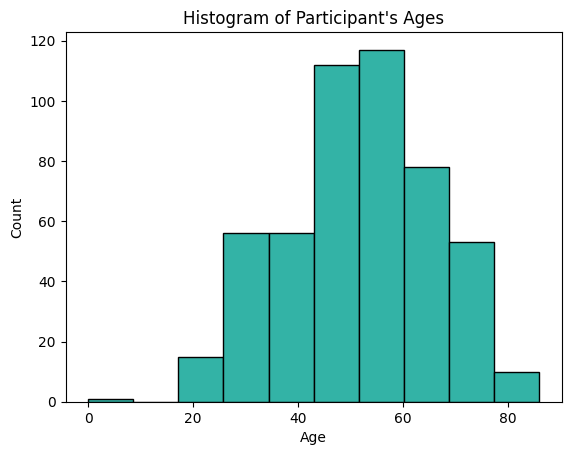

In [8]:
# ages histogram 

print(ncs['Age'].describe())

ncs['Age'].plot(kind = 'hist', color = '#33b3a6', edgecolor = 'black', bins = 10,
                 title = 'Histogram of Participant\'s Ages')

plt.xlabel("Age")
plt.ylabel("Count")

In [9]:
ncs['Age'].min()

np.float64(0.0)

This shows there is an error in the data - as according to the metadata, entrants should have been over 16.
And by looking at the minimum value of this set, it shows that there is a `0.0` value, and so we can remove that. 

count    497.000000
mean      51.694165
std       14.035490
min       18.000000
25%       42.000000
50%       52.000000
75%       62.000000
max       86.000000
Name: Age, dtype: float64


Text(0, 0.5, 'Count')

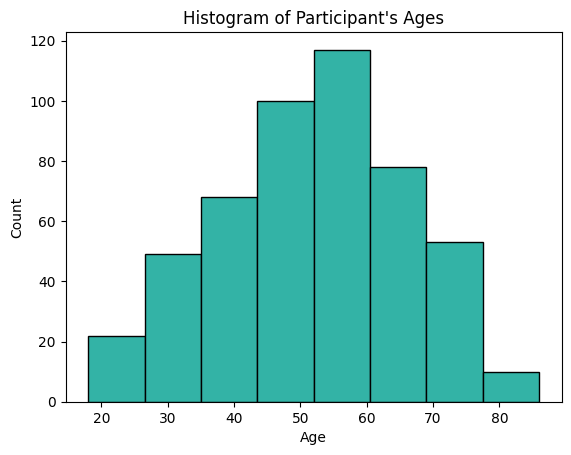

In [10]:
ncs=ncs[ncs['Age'] >= 16]

print(ncs['Age'].describe())

ncs['Age'].plot(kind = 'hist', color = '#33b3a6', edgecolor = 'black', bins  = 8,
             title = 'Histogram of Participant\'s Ages')
plt.xlabel("Age")
plt.ylabel("Count")

Interestingly, this looks like a pretty normal distribution of ages :) 

--------

### 2.2 Respondent's Gender 

The next section is looking at the gender distribution of the respondents. 

Sex
Female                 405
Male                    85
Prefer not to say        5
Other                    1
Other, please state      1
Name: count, dtype: int64


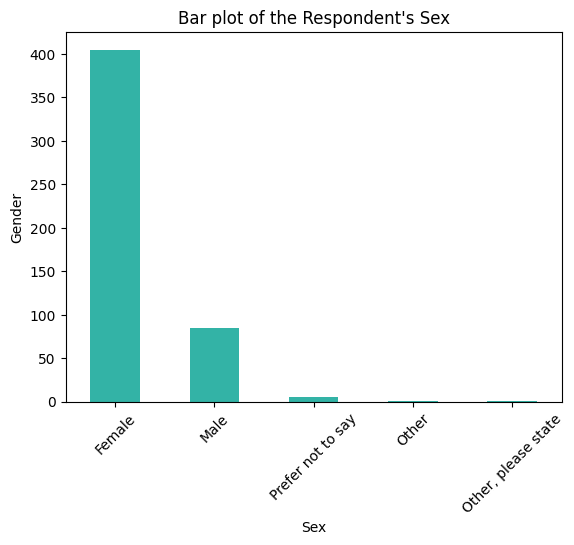

In [11]:
# looking at the count of each gender
print(ncs['Sex'].value_counts())

# plotting the chart of the counts of each gender
ncs['Sex'].value_counts().plot(kind = 'bar', color = '#33b3a6', title = 'Bar plot of the Respondent\'s Sex')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.ylabel("Gender")
plt.show();


In this chart, we can see that a large majority of the respondents identified as female. Due to this mismatch in numbers, I don't feel fully comfortable using this as a variable to split the data on. 

------

### 2.3 - Assigned Groups 

And next, we can look at the split of the groups that the respondents were assigned. 

conditiontext
acontrol              119
noticingnature        106
butterfly              93
combinedbutterfly      84
combinedpollinator     52
pollinator             43
Name: count, dtype: int64


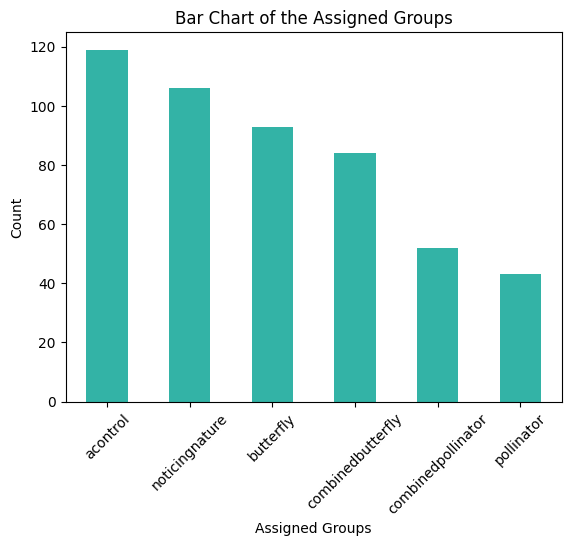

In [12]:
# condition bar chart 

print(ncs['conditiontext'].value_counts())

ncs['conditiontext'].value_counts().plot(kind = 'bar', color = '#33b3a6', title = 'Bar Chart of the Assigned Groups')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Assigned Groups")
plt.show();

This shows that the spread of groups looks fairly uninteresting - which is good :) 

I originally used this chart as a sense check to make sure there was a sensible amount of each group. 
Previously I included some other columns, which meant that I lost all of the control group when I got rid of null values, so this chart was helpful in visualising that mistake!

---------

### 2.4 - Spend Time Outside 

And finally, we can look at the `spendoutsideatleastafewtimesperweek` column. 

As a reminder, where `1` = almost everyday or a few times a week, `0` = once a week, less than once a week or none.



spendtimeoutsideatleastafewtimesperweek
1    465
0     32
Name: count, dtype: int64


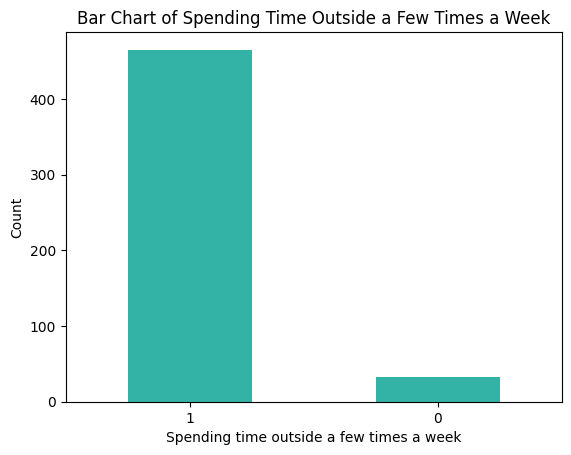

In [13]:
print(ncs['spendtimeoutsideatleastafewtimesperweek'].value_counts())

ncs['spendtimeoutsideatleastafewtimesperweek'].value_counts().plot(kind = 'bar', 
                                                                   color = '#33b3a6', 
                                                                   title = 'Bar Chart of Spending Time Outside a Few Times a Week')


plt.ylabel("Count")
plt.xlabel("Spending time outside a few times a week")
plt.xticks(rotation=0)
plt.show();

With this again, there is a very large majority on yes, spending time outside a few times per week. 
So this doesn't feel like a super valid variable to split the data on.

It is an interesting result though, I wonder if this type of survey reaches a specific type of person. 

-----

## 3. Pre/Post Visuals 

Next, we can look at the columns that cover the pre-activity and post-activity results for the following surveys: 

- INS
- NR6
- Health
- Happiness

### 3.1 - Inclusion of Nature in Self scale (INS)

Firstly, we can look at the INS score. This measures the respondent's psychological connection with nature by looking at two circles representing the respondent and nature, showing varying levels of overlap. 
These are then assigned a score from `1` to `7` going from completely separate to completely overlapping. 

In [14]:
print("INS_pre Information")
print(ncs['INS_pre'].value_counts())
print(ncs['INS_pre'].describe())
print(" ")
print("INS_post Information")
print(ncs['INS_post'].value_counts())
print(ncs['INS_post'].describe())

INS_pre Information
INS_pre
4.0    134
5.0    126
6.0     94
3.0     73
7.0     49
2.0     19
1.0      2
Name: count, dtype: int64
count    497.000000
mean       4.692153
std        1.325844
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: INS_pre, dtype: float64
 
INS_post Information
INS_post
5.0    157
6.0    120
4.0    116
3.0     46
7.0     37
2.0     19
1.0      2
Name: count, dtype: int64
count    497.000000
mean       4.841046
std        1.236575
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: INS_post, dtype: float64


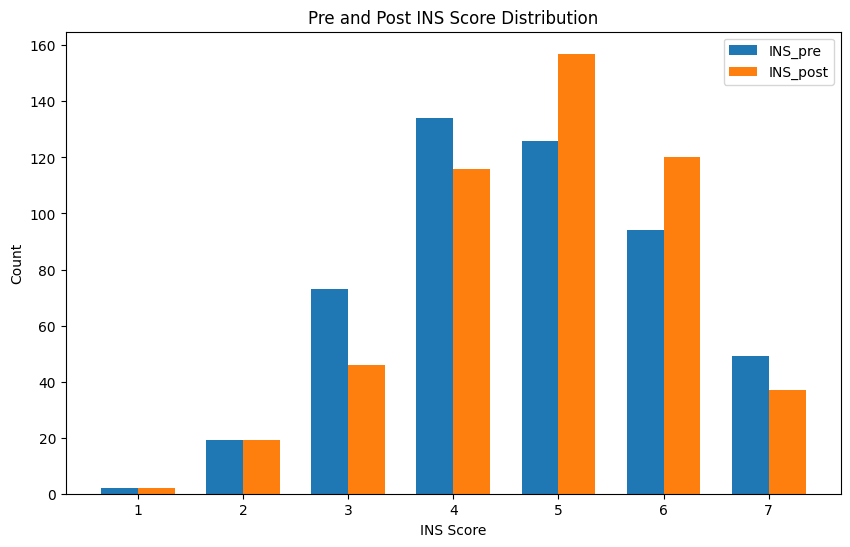

In [15]:
pre_counts = ncs['INS_pre'].value_counts().reindex(range(1, 8))
post_counts = ncs['INS_post'].value_counts().reindex(range(1, 8))

x = range(1, 8)
width = 0.35

plt.figure(figsize=(10, 6))
# the p-width/2 section means the bars don't overlap
plt.bar([p - width/2 for p in x], pre_counts, width=width, label='INS_pre')
plt.bar([p + width/2 for p in x], post_counts, width=width, label='INS_post')

plt.xlabel("INS Score")
plt.ylabel("Count")
plt.title("Pre and Post INS Score Distribution")
plt.legend()  # to add the colour key
plt.show()

So, in this chart you can see that it doesn't look like there are any HUGE differences between pre and post. 
There is a higher count of values in the post scores for `5` and `6`, but it would be interesting to review this later to see if it is statistically significant difference. 
Where the mean of the `INS_pre` is 4.96 and for `INS_post` is 4.84. 

----

### 3.2 Nature Relatedness-6 (NR6) Sum scores

For this section, the NR6 Survey presents 6 statements (such as *"My relationship to nature is an important part of who I am."*)to the respondent and asks them to rate `1` = disagree strongly, `5` = agree strongly. 

The sum of the scores is then taken, which gives a much larger range of values compared with the other columns. 

Because of this, I decided to plot this one as a histogram to focus on the distribution more. 

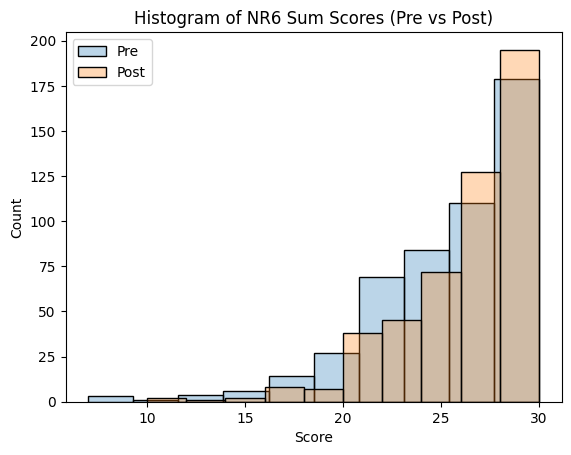

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ncs['NR6sum_pre'], kde=False, label='Pre', alpha=0.3, bins = 10)
sns.histplot(ncs['NR6sum_post'], kde=False, label='Post', alpha=0.3, bins = 10)

plt.legend()
plt.title("Histogram of NR6 Sum Scores (Pre vs Post)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

However, this looks really ugly, so I need to get the bins to line up so that its a bit easier to read. 

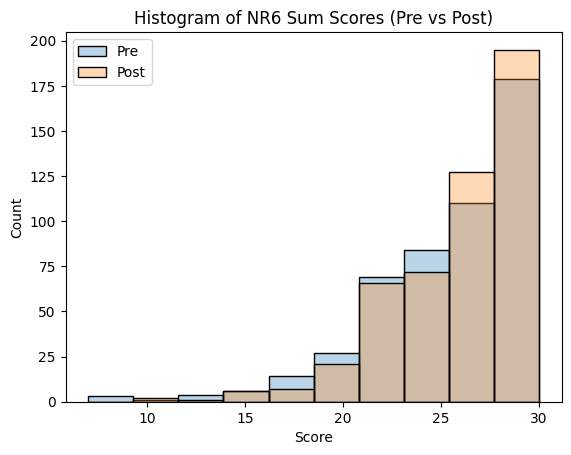

In [17]:
#  I can get them to line up by defining a binrange to make sure they're calculate over the same range!
binrange=(ncs[['NR6sum_pre', 'NR6sum_post']].min().min(), ncs[['NR6sum_pre', 'NR6sum_post']].max().max())

sns.histplot(ncs['NR6sum_pre'],bins=10, binrange=binrange, label='Pre', alpha=0.3)
sns.histplot(ncs['NR6sum_post'], bins=10, binrange=binrange, label='Post', alpha=0.3)

plt.legend()
plt.title("Histogram of NR6 Sum Scores (Pre vs Post)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

Whilst this chart is not the clearest visualisation, it does look like the post-activity NR6sum scores are higher than the pre-activity scores. This could indicate that in general, the activities have had a positive impact on respondent's feelings of nature relatedness. 

------

### 3.3 Health Scores 

This is just a single score where respondents rate their health on a scale of `1` to `5` from Poor to Excellent. 

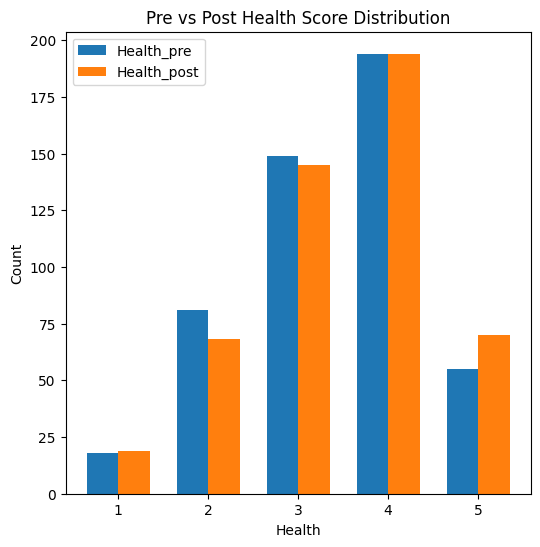

In [18]:
pre_counts = ncs['Health_pre'].value_counts().reindex(range(1, 6))
post_counts = ncs['Health_post'].value_counts().reindex(range(1, 6))

x = range(1, 6)
width = 0.35

plt.figure(figsize=(6, 6))
# the p-width/2 section means the bars don't overlap
plt.bar([p - width/2 for p in x], pre_counts, width=width, label='Health_pre')
plt.bar([p + width/2 for p in x], post_counts, width=width, label='Health_post')

plt.xlabel("Health")
plt.ylabel("Count")
plt.title("Pre vs Post Health Score Distribution")
plt.legend()
plt.show()


This visualisation doesn't seem to highlight anything major. It looks like there could possibly be an improvement in Health scores after the activities, however, it doesn't seem to show anything clear. 

------

### 3.4 Happiness Scores 

This is just a single score where respondents rate their happiness on a scale of `1` to `11` from `Not at all happy' to 'Very happy'. 


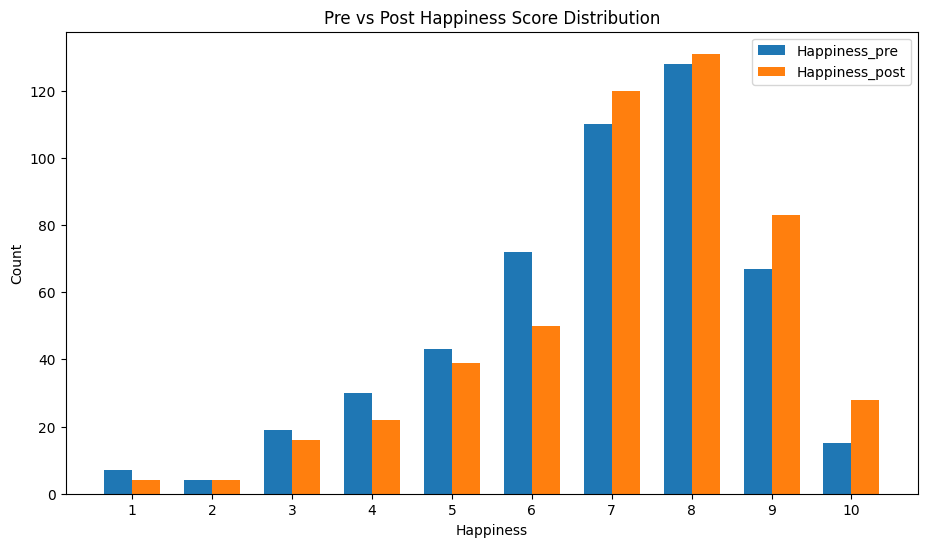

In [19]:
pre_counts = ncs['Happiness_pre'].value_counts().reindex(range(1, 11))
post_counts = ncs['Happiness_post'].value_counts().reindex(range(1, 11))

x = range(1, 11)
width = 0.35

plt.figure(figsize=(11, 6))
# the p-width/2 section means the bars don't overlap
plt.bar([p - width/2 for p in x], pre_counts, width=width, label='Happiness_pre')
plt.bar([p + width/2 for p in x], post_counts, width=width, label='Happiness_post')

plt.xticks(x)
plt.xlabel("Happiness")
plt.ylabel("Count")
plt.title("Pre vs Post Happiness Score Distribution")
plt.legend()
plt.show()



It looks like for both pre and post, there is a larger concentration at 7/8/9 which is positive! This could indicate that there is a possible shift in the post_activity scores getting higher. 

---

These charts were looking at these scores as a whole, but it could be interesting to break up the pre/post scores by the assigned groups. 

## 4. Pre/Post tests

Lets see if splitting up the survey scores by group shows any difference in pre/post differences. This might indicate that the different groups/activities have an impact on happiness, health, nature relatedness and inclusion in nature!

Also, I just wanted to acknowledge that because these survey scores are integers, and we're looking at the differences, there is not a wide range of possible answers, this means that the box plots may not be the most useful visualisation. However it does give us an opprtunity to see a by-group overview and get a rough idea of the spread of the differences between pre and post scores for each individual group. 

### 4.1 Pre/Post Differences by Group

#### 4.1.1 INS Difference Column Description by Group

Lets firstly have a *brief* look at the descriptions of the INS difference columns **split by group** that was added earlier. 

INS Pre/Post Difference Description by activity group:
                    count      mean       std  min  25%  50%  75%  max
conditiontext                                                         
acontrol            119.0 -0.151261  0.953483 -3.0 -1.0  0.0  0.0  2.0
butterfly            93.0  0.161290  0.755995 -1.0  0.0  0.0  1.0  3.0
combinedbutterfly    84.0  0.214286  0.906090 -4.0  0.0  0.0  1.0  2.0
combinedpollinator   52.0  0.230769  0.807207 -1.0  0.0  0.0  1.0  2.0
noticingnature      106.0  0.349057  0.966510 -4.0  0.0  0.0  1.0  3.0
pollinator           43.0  0.232558  0.811736 -1.0  0.0  0.0  0.5  3.0


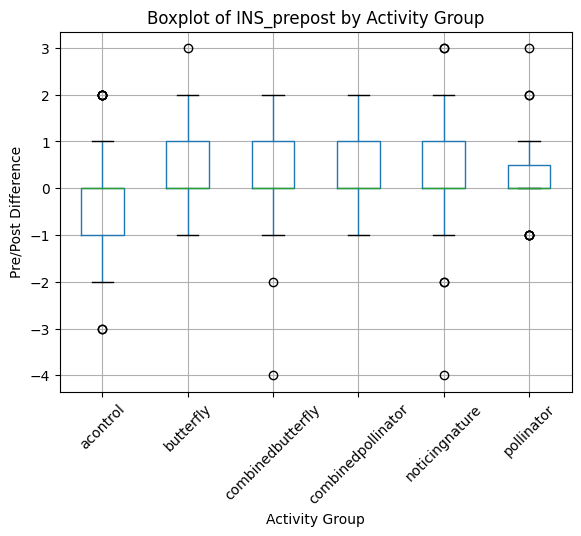

In [20]:
print("INS Pre/Post Difference Description by activity group:")
print(ncs.groupby('conditiontext')['INS_prepost'].describe())

ncs.boxplot(column = 'INS_prepost', by = 'conditiontext')
plt.title('Boxplot of INS_prepost by Activity Group')
plt.suptitle('')
plt.xticks(rotation=45)
plt.xlabel("Activity Group")
plt.ylabel("Pre/Post Difference")
plt.show();

This boxplot doesn't seem to show anything too interesting, it seems to indicate that there is a mean of change of 0 for all of the groups, but also that for all groups excluding the control group there is a mostly positive trend in the INS score post-activity!

---

#### 4.1.2 NR6sum Difference Column Description by Group

And now the same again but with the NR6 sum values. This one had a wider variety of possible numbers since this is the sum of values over 6 questions.

NR6 Sum Pre/Post Difference Description by activity group:
                    count      mean       std   min  25%  50%  75%   max
conditiontext                                                           
acontrol            119.0  0.025210  2.304977 -10.0 -1.0  0.0  1.0   6.0
butterfly            93.0  0.602151  2.054369  -4.0 -1.0  0.0  2.0   9.0
combinedbutterfly    84.0  0.988095  1.966552  -3.0  0.0  1.0  2.0   8.0
combinedpollinator   52.0  0.153846  1.786492  -7.0 -1.0  0.0  1.0   4.0
noticingnature      106.0  0.915094  2.268282  -3.0  0.0  1.0  2.0  13.0
pollinator           43.0  0.674419  3.771579  -6.0 -1.0  0.0  1.0  20.0


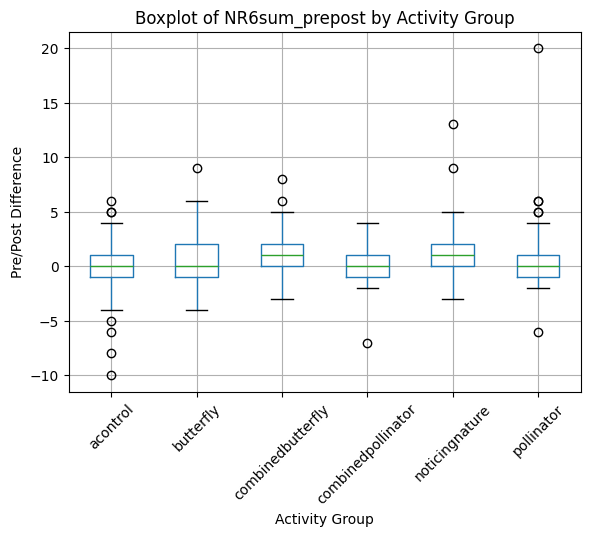

In [21]:
print("NR6 Sum Pre/Post Difference Description by activity group:")
print(ncs.groupby('conditiontext')['NR6sum_prepost'].describe())

ncs.boxplot(column = 'NR6sum_prepost', by = 'conditiontext')
plt.title('Boxplot of NR6sum_prepost by Activity Group')
plt.suptitle('')
plt.xticks(rotation=45)
plt.xlabel("Activity Group")
plt.ylabel("Pre/Post Difference")
plt.show();

Again, this one shows the majority of groups having a mean of 0, except `noticingnature` and `combinedbutterfly`, ehich were slightly higher! 
This also indicates a mostly positive trend again which is nice - with NR6sum scores being mostly higher post-activity. 

It is slightly difficult to read as there is a large outlier for the pollinator group. 

---

#### 4.1.3 Health Difference Column Description by Group

Next, the Health pre/post difference scores.

Health Pre/Post Difference Description by activity group:
                    count      mean       std  min  25%  50%  75%  max
conditiontext                                                         
acontrol            119.0  0.042017  0.476480 -1.0  0.0  0.0  0.0  1.0
butterfly            93.0  0.096774  0.512125 -1.0  0.0  0.0  0.0  1.0
combinedbutterfly    84.0  0.154762  0.548691 -1.0  0.0  0.0  0.0  2.0
combinedpollinator   52.0  0.096154  0.495454 -1.0  0.0  0.0  0.0  1.0
noticingnature      106.0  0.103774  0.616121 -2.0  0.0  0.0  0.0  3.0
pollinator           43.0  0.023256  0.635774 -1.0  0.0  0.0  0.0  1.0


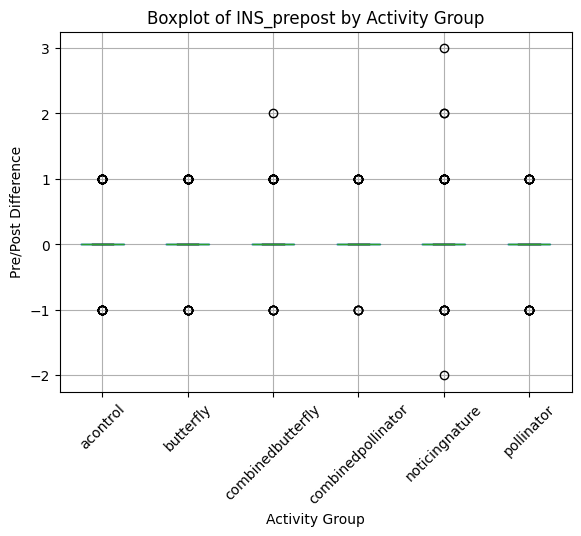

In [22]:
print("Health Pre/Post Difference Description by activity group:")
print(ncs.groupby('conditiontext')['Health_prepost'].describe())

ncs.boxplot(column = 'Health_prepost', by = 'conditiontext')
plt.title('Boxplot of INS_prepost by Activity Group')
plt.suptitle('')
plt.xticks(rotation=45)
plt.xlabel("Activity Group")
plt.ylabel("Pre/Post Difference")
plt.show();

This boxplot is interesting, because the boxes and whiskers are collapsed on 0, with any other value being an outlier. This may suggest that there is a high concentration on the difference between pre and post health scores being 0 .This could indicate that these activities did not have a strong impact on how participants viewed their health. Interesting! 

---

#### 4.1.4 Happiness Difference Column Description by Group

And finally, the pre/post difference in happiness scores broken down by group:

Happiness Pre/Post Difference Description by activity group:


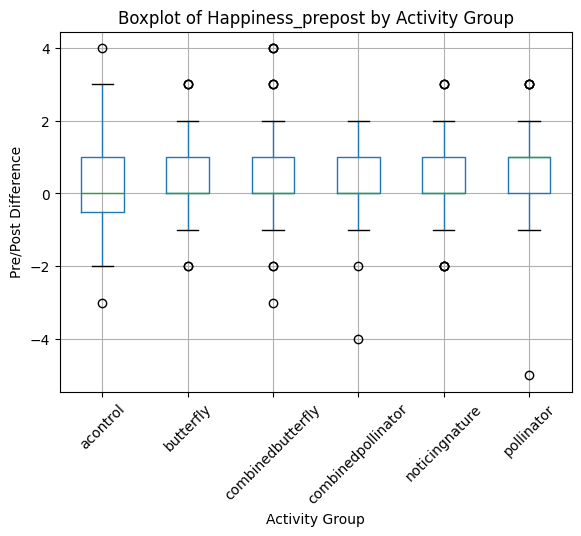

In [23]:
print("Happiness Pre/Post Difference Description by activity group:")
ncs.groupby('conditiontext')['Happiness_prepost'].describe()

ncs.boxplot(column = 'Happiness_prepost', by = 'conditiontext')
plt.title('Boxplot of Happiness_prepost by Activity Group')
plt.suptitle('')
plt.xticks(rotation=45)
plt.xlabel("Activity Group")
plt.ylabel("Pre/Post Difference")
plt.show();

Similarly to the others, most of the groups have a mean of 0, except pollinator interestingly, which has a mean of 1 :) 
Again, the groups have a mostly positive trend, so it's possible that these activties had a positive effect on respondents happiness!

### 4.2 - Significant Difference between INS pre and post scores? 

Like we mentioned above in 3.1, it looks like there is a difference between pre and post INS scores, so we should check to see if there is any different between the INS scores pre and post the activity for all groups. 

To tackle this question, the hypothesis would be: 

* H<sub>0</sub>: mean of pre-activity INS scores  =  mean of post-activity INS scores
* H<sub>A</sub>: mean of pre-activity INS scores =/= mean of post-activity INS scores

Because these are the same group of respondents, but pre and post, we need to use a paired t-test as they are dependent groups. 

Firstly, we will look at the means and standard deviations of the pre and post scores individually to see if it looks like there are any obvious differences:

In [24]:
print('The mean of the pre-activity INS scores is: ', ncs['INS_pre'].mean())
print('The standard deviation of the pre-activity INS scores is: ', ncs['INS_pre'].std())
print('')
print('The mean of the post-activity INS score is: ', ncs['INS_post'].mean())
print('The standard deviation post-activity INS scores is: ', ncs['INS_post'].std())
print('')
print('That is a difference in means of: ', ncs['INS_post'].mean()-ncs['INS_pre'].mean())

The mean of the pre-activity INS scores is:  4.69215291750503
The standard deviation of the pre-activity INS scores is:  1.325843763890192

The mean of the post-activity INS score is:  4.841046277665996
The standard deviation post-activity INS scores is:  1.23657521321378

That is a difference in means of:  0.1488933601609661


There is a difference in means of about 0.15. I am not sure if this is a statistically significant difference in means, so I should check this with a paired t-test. 

To do this, I can use the `.ttest_rel` function from `scipy.stats`. 


In [25]:
ht1 = sp.ttest_rel(ncs['INS_pre'], ncs['INS_post'])
ht1

TtestResult(statistic=np.float64(-3.68257498016494), pvalue=np.float64(0.00025625098474298683), df=np.int64(496))

Looking at the results here - 

Statistic is the t-statistic, which looks at the size of the difference in means. It is negative, so it is showing that the post scores are higher. 

The p-value shows us if this is a statistically significant difference, and e compare this aghainst our level of 5%. 

In this case, the p-value (0.0002) is much smaller than 0.05, which shows us that the likelihood of seeing this difference in means assuming there was no change in pre/post values. 

Therefore, we can say: 
The`INS_pre` (M=4.69, SD=1.33) compared to the `INS_post` (M=4.84, SD=1.24) **is** statistically significantly different (t = -3.68 , df = 496 , p < 0.001). Therefore, we reject the null hypothesis. 

Nice, interesting finding - so this shows us that across all the groups, it could be true that all of the activities they undertook improve inclusion of self in nature. 

### 4.3 Is there a difference between the groups? 

So, we have seen above that across all groups there is a difference between pre and post scores for INS, we should check if the mean change is the same across all groups. In this case, the hypotheses would be: 

* H<sub>0</sub>: The mean INS change is the same across all groups.
* H<sub>A</sub>: The mean INS change is different for at least one group.

In order to test this, we would need to use the `.f_oneway` function from `scipy.stats`. This is the One Way ANOVA test - which is suitable for this because we are testing multiple means against one independent variable (which is the group!). 

In [26]:
ht2 = sp.f_oneway(
                    ncs[ncs['conditiontext']=='acontrol']['INS_prepost']
                  , ncs[ncs['conditiontext']=='butterfly']['INS_prepost']
                  , ncs[ncs['conditiontext']=='combinedbutterfly']['INS_prepost']
                  , ncs[ncs['conditiontext']=='combinedpollinator']['INS_prepost']
                  , ncs[ncs['conditiontext']=='noticingnature']['INS_prepost']
                  , ncs[ncs['conditiontext']=='pollinator']['INS_prepost']
                    )
ht2

F_onewayResult(statistic=np.float64(4.057756042245269), pvalue=np.float64(0.0012818489297505237))

So, in this case, the p value = 0.001, and so it is p < 0.05, which indicates that the mean INS change is different for at least one group. 

This means that whilst we showed in 4.2 that there is a difference between pre and post INS scores across all groups, the change in INS scores pre and post activity are varied across different activity groups. 

### 4.4 - Significant Difference between INS pre and post scores for `noticingnature`?

As we have seen that the differences vary across the activities, we could zoom on in a specific group to see if there is a difference for an individual group. 

Lets pick the `noticing nature` group (as it is the group with the most similar size to the control group).

In this case, the hypotheses could be:

* H<sub>0</sub>: mean of pre-noticingnature INS scores  =  mean of post-noticingnature INS scores
* H<sub>A</sub>: mean of pre-noticingnature INS scores =/= mean of post-noticingnature INS scores

In [27]:
print('The mean of the pre-activity INS scores is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_pre'].mean())
print('The standard deviation of the pre-activity INS scores is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_pre'].std())
print('')
print('The mean of the post-activity INS score is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_post'].mean())
print('The standard deviation post-activity INS scores is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_post'].std())
print('')
print('That is a difference in means of: ', ncs[ncs['conditiontext']=='noticingnature']['INS_post'].mean()-ncs[ncs['conditiontext']=='noticingnature']['INS_pre'].mean())

The mean of the pre-activity INS scores is:  4.650943396226415
The standard deviation of the pre-activity INS scores is:  1.3240806537812864

The mean of the post-activity INS score is:  5.0
The standard deviation post-activity INS scores is:  1.2031704150364766

That is a difference in means of:  0.34905660377358494


We can check if this difference of 0.35 is statistically significant by using the `ttest_rel` function again as these are the pre/post scores for the same group. 

In [28]:
ht3 = sp.ttest_rel(ncs[ncs['conditiontext']=='noticingnature']['INS_pre'], ncs[ncs['conditiontext']=='noticingnature']['INS_post'])
ht3

TtestResult(statistic=np.float64(-3.7182822345541107), pvalue=np.float64(0.0003238605272096843), df=np.int64(105))

In this case, the`INS_pre` (M=4.65, SD=1.32) compared to the `INS_post` (M=5.0, SD=1.20) is statistically significantly different (t = -3.72, df = 105 , p < 0.001). Therefore, we reject the null hypothesis. 

This means that for `noticingnature`, there is a statistically significant difference between pre and post activity score!

---

### 4.5 Looking at INS score differences for the `acontrol` group and `noticingnature` group

I also thought it might be interesting to compare the differences between the `noticingnature` group and the `acontrol` group to see if there is a statistically significant difference between these two groups' change in INS scores. 

I'll check the means of the changes in groups first:

In [29]:
# if we just wanted to look at the acontrol and noticing nature groups - lets look at the means of those. 

print('The mean of the change in INS scores for the control group is: ', ncs[ncs['conditiontext']=='acontrol']['INS_prepost'].mean())
print('The standard deviation of the change in INS scores for the control group is: ', ncs[ncs['conditiontext']=='acontrol']['INS_prepost'].std())
print('')
print('The mean of the change in INS scores for the noticingnature group is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_prepost'].mean())
print('The standard deviation of the change in INS scores for the noticingnature group is: ', ncs[ncs['conditiontext']=='noticingnature']['INS_prepost'].std())
print('')
print('That is a difference in means of: ', (ncs[ncs['conditiontext']=='noticingnature']['INS_prepost'].mean()) - (ncs[ncs['conditiontext']=='acontrol']['INS_prepost'].mean()) )
print('')
print('Is this a statistically significant difference in means?') 

The mean of the change in INS scores for the control group is:  -0.15126050420168066
The standard deviation of the change in INS scores for the control group is:  0.9534829592585038

The mean of the change in INS scores for the noticingnature group is:  0.3490566037735849
The standard deviation of the change in INS scores for the noticingnature group is:  0.966510195843924

That is a difference in means of:  0.5003171079752655

Is this a statistically significant difference in means?


I want to see if INS scores changed substantially pre/post for control vs noticing nature

So, in this case, the hypotheses might be: 

* H<sub>0</sub>: the mean change in INS for control group  =  the mean change in INS for noticing nature group.
* H<sub>A</sub>: the mean change in INS for control group =/= the mean change in INS for noticing nature group.

In this case, we will need to use an independent sample test, because these are two seperate groups, and so we can use the `sp.ttest_ind` function from `scipy`.

In [30]:
# I need to make the groups of the INS differences for acontrol and for noticingnature
ncs_acontrol_INS = ncs[ncs['conditiontext'] == 'acontrol']['INS_prepost']
ncs_noticingnature_INS = ncs[ncs['conditiontext'] == 'noticingnature']['INS_prepost']

# then I can run the independent sample t-test to see if there is a statistically significant difference. 
ht4 = sp.ttest_ind(ncs_acontrol_INS, ncs_noticingnature_INS)
ht4

TtestResult(statistic=np.float64(-3.903666140175964), pvalue=np.float64(0.00012553380435695918), df=np.float64(223.0))

The change in INS scores for the `acontrol` group (M=-0.15, SD=0.95) compared to that of the change in INS scores for the `noticingnature` group (M=0.35, SD= 0.97) is statistically significantly different (t = -4.1, df = 224, p < 0.001). We reject the null hypothesis.  

## 4.6 `butterfly` and `pollinator` INS Differences

And finally, I wanted to look at two groups where the change in INS scores looked fairly similar, to see if they would be statistically significant. I would guess that the outcome will be no, because they look quite close to each other.  

The hypotheses for these would likely be: 

* H<sub>0</sub>: the mean change in INS for pollinator  =  the mean change in INS for butterfly.
* H<sub>A</sub>: the mean change in INS for pollinator =/= the mean change in INS for butterfly.

In [31]:
ncs_pollinator_INS = ncs[ncs['conditiontext'] == 'pollinator']['INS_prepost']
ncs_butterfly_INS = ncs[ncs['conditiontext'] == 'butterfly']['INS_prepost']

print('The mean of the post-activity INS score is: ', ncs_pollinator_INS.mean())
print('The standard deviation post-activity INS scores is: ', ncs_pollinator_INS.std())
print('')
print('The mean of the pre-activity INS scores is: ', ncs_butterfly_INS.mean())
print('The standard deviation of the pre-activity INS scores is: ', ncs_butterfly_INS.std())
print('')
print('That is a difference in means of: ', ncs_pollinator_INS.mean()-ncs_butterfly_INS.mean())

The mean of the post-activity INS score is:  0.23255813953488372
The standard deviation post-activity INS scores is:  0.8117356273332904

The mean of the pre-activity INS scores is:  0.16129032258064516
The standard deviation of the pre-activity INS scores is:  0.7559952061707507

That is a difference in means of:  0.07126781695423856


In [32]:
ht5 = sp.ttest_ind(ncs_butterfly_INS, ncs_pollinator_INS)

ht5

TtestResult(statistic=np.float64(-0.49936244859732565), pvalue=np.float64(0.6183429609491349), df=np.float64(134.0))

Woo! In this case, the p-value is much bigger than 0.05, so we can confidently say that the difference between these is not statistically significant, so we cannot reject the null hypothesis. This might suggest that the butterfly and pollinator activities have similar impacts on INS scores. 

----

## 5. Summary 

I thought this was a really interesting dataset :)
It had a lot of information of different surveys and activities. 
I also didn't include a lot of other columns that could be interesting to look at in the future. 

##### Demographic/ Non-Survey Data

The demographic/ non-survey answer data was quite interesting, but it didn't offer lots of ways to split up the data. The most useful was the assigned groups. TThere was also a wide range of age data, which could be interesting to look at in the future. However there was a clear majority on the gender data and the data on spending time outside. I would be interested in finding out more about the mechanism of recruiting. 

##### Visuals of Pre/Post Survey Data 

This was an interesting way of visualising the differences between pre/post data for each of the surveys and showed that for the majority of the surveys (INS, NR6sum, Happiness), there could be a possible rise in scores after respondents took part in the activities. However, this was less obvious for the Health results. 
Also, these would need to be further investigated to make any solid statements. 

##### Boxplots 

To further dig into these, I thought it could be interesting to break these survey results up by the assigned groups, and so these box plots aimed to highlight the pre/post differences for eah of the surveys broken down by group. 
These al showed a fairly similar story of: 
* Majority of means being 0 - indicating no change from pre/post
* But there being a positive trend, where the rest of the box was above the 0 mark. 

However, it was obvious that these box plots were not the best visualisations due to the data type and the small range of possible values, which was the clearest in the Health box plots. 

##### Statistical Tests

And finally, I ran some statistical tests on to test various hypotheses, which resulted in these conclusions:

* On average there was a statistically significant change overall from pre and post INS scores across all assigned activity groups. 
* There were differing changes in pre/post differences across the different groups - which means these different activities likely had different impacts on the feeling of being teh inclusion of nature in self.
* Zooming in on an individual group, there is a statistically significant difference between the pre and post INS mean scores for the `noticingnature` group, which indicates that the people in this group likely felt more of a part of nature after they took part in the activity of noticing three good things in nature.
* The analysis also showed that the change in the mean pre/post INS scores for the `noticingnature` group compared with the `acontrol` group are statistically significantly different - which highlights that the activity had a significant impact compared to not doing any activity. 
* And finally, the `pollinator` and `butterfly` pre/post differences in INS scores were not statistically different, which could highlight that in this case, these activities offered a similar impact on inclusion of nature in self. 